In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
df.describe()

c:\users\530222\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [3]:
df["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [8]:
from sklearn.utils import resample

df_maj=df[df.SEVERITYCODE==1]
df_min=df[df.SEVERITYCODE==2]
df_maj_dsample=resample(df_maj,replace=False,n_samples=58188,random_state=123)
balanced_df=pd.concat([df_maj_dsample,df_min])
balanced_df.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [12]:
numerical=['PERSONCOUNT','PEDCOUNT','VEHCOUNT']
categorical=['SEVERITYDESC','ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND']
df=df[numerical+categorical]
df.shape

(194673, 10)

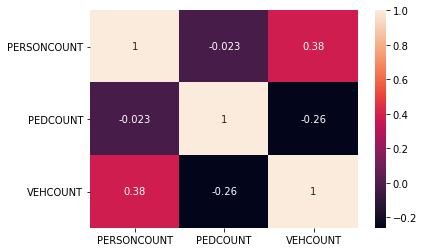

In [17]:
corelation=df.corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

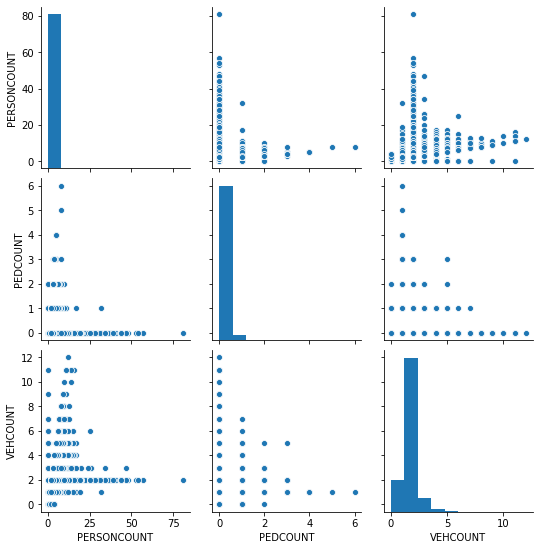

In [18]:
sns.pairplot(df)

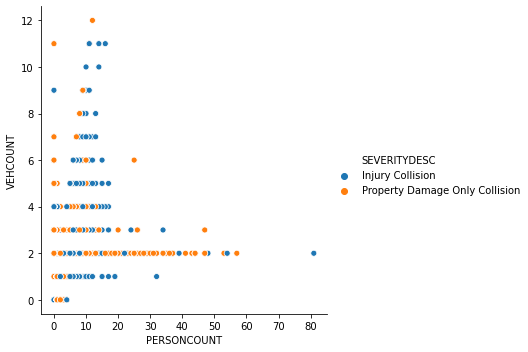

In [20]:
sns.relplot(x='PERSONCOUNT',y='VEHCOUNT',hue='SEVERITYDESC',data=df)


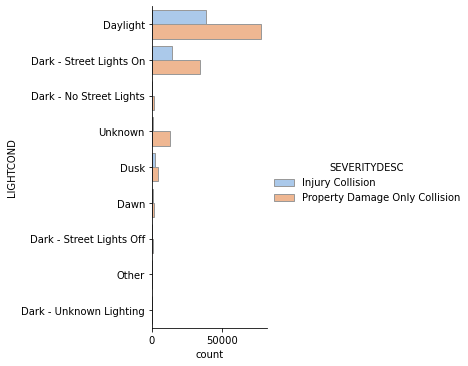

In [21]:
sns.catplot(y='LIGHTCOND',hue='SEVERITYDESC',kind='count',palette='pastel',
edgecolor='0.6',data=df)

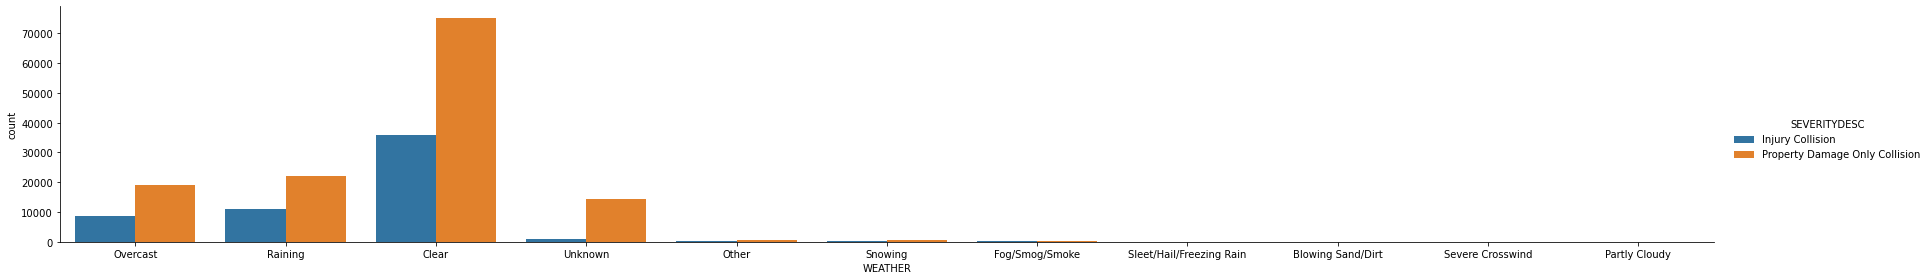

In [22]:
sns.catplot(x='WEATHER',kind='count',hue='SEVERITYDESC',data=df,height=4,aspect=6)

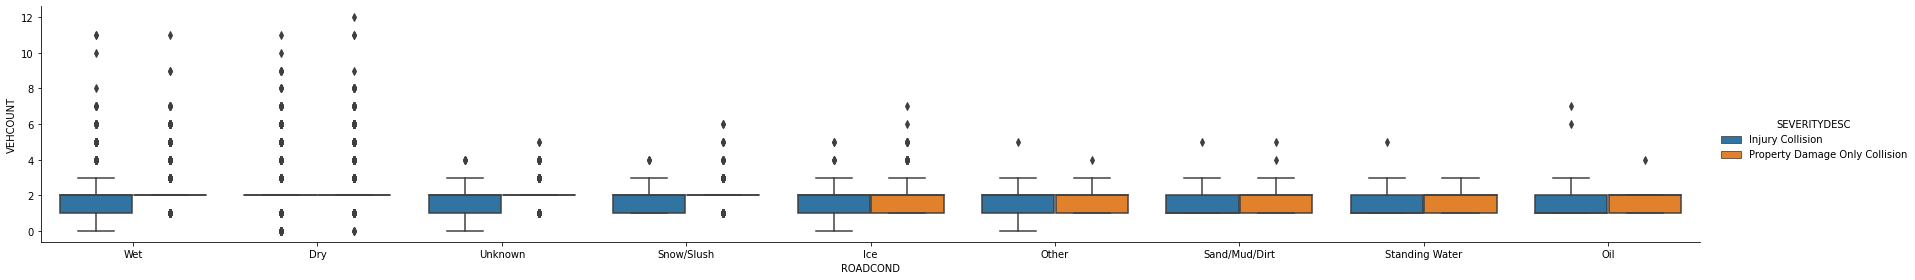

In [24]:
sns.catplot(x='ROADCOND',y='VEHCOUNT',kind='box',hue='SEVERITYDESC',data=df,height=4,aspect=6)

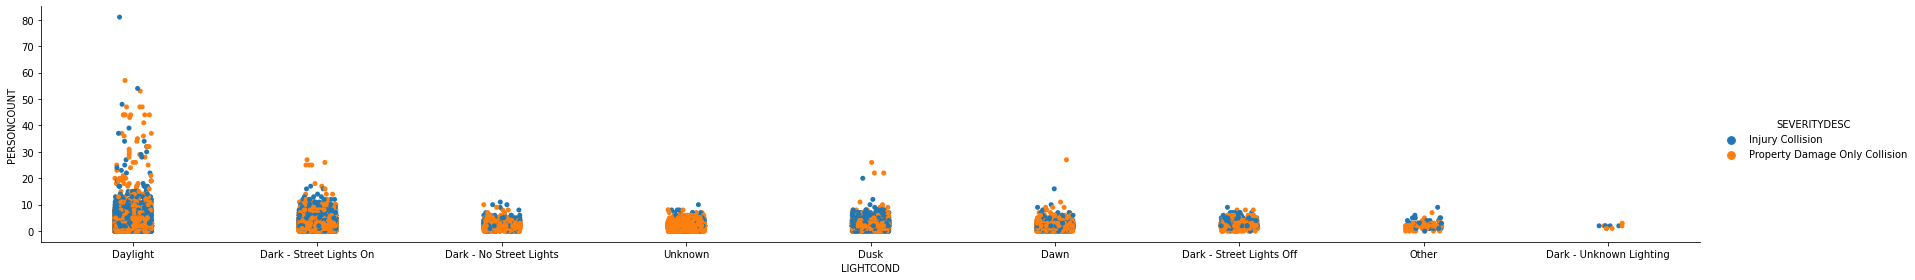

In [25]:
sns.catplot(x='LIGHTCOND',y='PERSONCOUNT',hue='SEVERITYDESC',data=df,height=4,aspect=6)